In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-jobs/DataAnalyst.csv


# Import DataSet 'Data Analyst Jobs'

In [2]:
# IMPORT DATA AND PACKED
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots 
from plotly.offline import init_notebook_mode, iplot

In [3]:
# Conditions all for the plotting
sns.set()
pd.options.plotting.backend = 'plotly'
plt.style.use('seaborn')
init_notebook_mode(connected = True)

In [4]:
#Charge data csv 'data-analyst-jobs' as format Dataframe from pandas
df = pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
# General info from data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

# Data Cleaning to be Worked On

In [6]:
# Delete column "Unnamed: 0"
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
# Copy data a new DataFrame
df1 = df.copy()
df1.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


In [7]:
# DATA CLEANING

#Separate values for create new two fields from them:
df1['Job Title'],df1['Department']= df['Job Title'].str.split(',',1).str
df1['Company Name'],_ = df['Company Name'].str.split('\n',1).str
df1['Salary Estimate'],_= df['Salary Estimate'].str.split('(',1).str
df1['Min Salary'],df1['Max Salary']= df1['Salary Estimate'].str.split('-').str

# Created values Max Salary and Min Salary as well as data cleaning with strip methods from string class
# Replace withe spaces for nan values through the numpy.
clean_salary = lambda x: x.replace('', np.nan).str.strip().str.lstrip('$').str.rstrip('K').fillna(0).astype(int)
df1['Min Salary'] = clean_salary(df1['Min Salary'])
df1['Max Salary'] = clean_salary(df1['Max Salary'])

# Empty Field 'Salary Estimate' but created Max and Min salary.
df1 = df1.drop(['Salary Estimate'],axis = 1)

# Show 'df1' with the changes realized previously. 
df1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,Min Salary,Max Salary
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,Center on Immigration and Justice (CIJ),37,66
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN,37,66
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,Insights & Analytics Team [Customer Operations],37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66


# Companies Easy Apply for Data Analyst Jobs

In [8]:
# DATA ANALYTICS
# Count values from easy apply for each job offers
df1['Easy Apply'].value_counts()

-1      2173
True      80
Name: Easy Apply, dtype: int64

In [9]:
# Easy applicated only 80 companies, the rest could to be applicated dificult it.
# With a function, it recodes key and values to take new values between 0 and 1
def recode(column, new_code):
    col_cod = pd.Series(column, copy = True)
    for key, values in new_code.items():
        col_cod.replace(key, values, inplace = True)
    return col_cod

In [10]:
# Use the new function
df1['Easy Apply'] = recode(df1['Easy Apply'],{'-1':0,'True':1})
df1['Competitors'] = recode(df1['Competitors'],{'-1':np.nan})

# Extracted data the Easy Apply with values equal '1', in the other words,  
# this part will to make only in offers jobs where is easy applicated
df_easy_apply = df1[df1['Easy Apply'] == 1]
df_easy_apply.reset_index()
df_easy_apply.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,Min Salary,Max Salary
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,1,Center on Immigration and Justice (CIJ),37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,1,NaN,37,66
7,Data Science Analyst,Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",1,NaN,37,66
13,Senior Data Analyst,About Known\n\nKnown is a modern marketing com...,3.0,Known,"New York, NY","New York, NY",201 to 500 employees,2004,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),NaN,1,NaN,37,66
16,Data Analyst,Undertone stands alone among AdTech and ad net...,3.8,Undertone,"New York, NY","New York, NY",201 to 500 employees,2001,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"DoubleClick, Specific Media, Collective",1,NaN,37,66


In [11]:
# New Dataframe through method 'Groupby' from 'pandas' packet. It's grouped in fallen order and count the values "Easy Apply" for each offer jobs
df_easy_apply_1 = df_easy_apply.groupby(['Company Name','Sector'])['Easy Apply'].count().reset_index()
# In the same way, apply method 'Groupby' with the values "Max Salary". It's grouped throght it's average
df_easy_apply_2 = df_easy_apply.groupby(['Company Name'])['Max Salary'].mean().reset_index()
# Apply concate fields and order descendent for dataframe before and perform cut in ten primary
df_easy = pd.DataFrame()
df_easy = pd.concat([df_easy_apply_1['Company Name'], df_easy_apply_1['Easy Apply'], 
                     df_easy_apply_2['Max Salary']], axis = 1)
df_easy = df_easy.sort_values('Easy Apply', ascending = False).head(10).reset_index().drop('index', axis = 1)
df_easy.head(10)

,Company Name,Easy Apply,Max Salary
0,Apex Systems,10,86.700000
1,22nd Century Technologies,5,92.200000
2,Chime,3,106.333333
3,Signify Health,3,62.666667
4,22nd Century Staffing,2,100.000000
5,Tempus Labs,2,105.500000
6,Undertone,2,66.000000
7,BOLD,2,132.000000
8,Omada Health,1,159.000000
9,OSI Engineering,1,190.000000


In [12]:
# Plot graph bar with Plotly included color graduation in function the Max Salary Mean.
chart = px.bar(df_easy, y = 'Easy Apply', x = 'Company Name', color = 'Max Salary',
              color_continuous_scale = px.colors.sequential.Viridis,
              title = "Companies That Have Jobs as Data Analyst With Easily Apply")
chart.show()

# **Size Company - Employed Quantity that Offer Jobs as a Data Analyst**

In [13]:
# Now, visualization of size company in funtion quantily employees that offers job in data analyst.

# Create DateFrame and empty rows with useless data
# Change of field names for easy descriptive in graphic and visualization
df_employed = df1['Size'].value_counts().to_frame().reset_index()
df_employed = df_employed.drop(df_employed[(df_employed['index'] == '-1') | \
                                           (df_employed['index'] == 'Unknown')].index, 
                               axis = 0).rename(columns = {'index': 'Size Company',
                                                           'Size': 'Nº Company'})
df_employed.head()

,Size Company,Nº Company
0,51 to 200 employees,421
1,10000+ employees,375
2,1001 to 5000 employees,348
3,1 to 50 employees,347
4,201 to 500 employees,249


In [14]:
# Finally, plot graphic barplot in horizontal for Size Company in function of employees Quantity:
# Use Plotly Express
chart1 = px.bar(df_employed, x = 'Nº Company', y = 'Size Company',
               title = 'Size Company in function of employees Quantity')
chart1.show()

# Classification of Companies vs Ratings

In [15]:
# Use grouby method for get a new dataframe thad measure number companies your rating
# In addition, we order descending in the ratings function, discard lower rating values that 3.00 
# And rename fields
df_rating = df1.groupby('Rating')['Company Name'].count().to_frame().reset_index()\
                        .sort_values('Rating', ascending = False).reset_index()\
                        .drop('index', axis = 1)\
                        .rename(columns = {'Company Name': 'Nº Companies'})

df_rating = df_rating.drop(df_rating[(df_rating['Rating'] <= 3.00)].index, axis = 0)

df_rating.head()

,Rating,Nº Companies
0,5.0,131
1,4.9,17
2,4.8,29
3,4.7,23
4,4.6,46


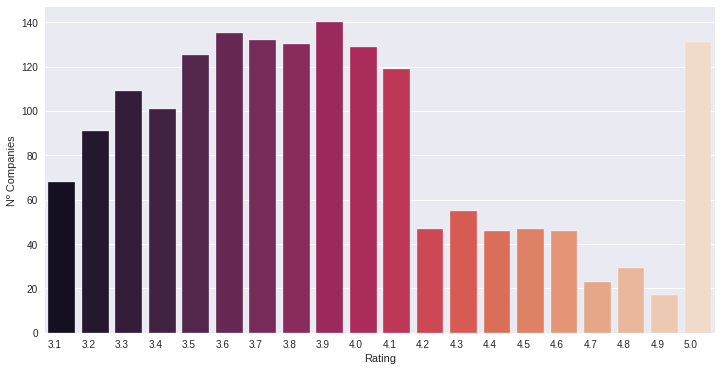

In [16]:
# Plot visualization in graphic bars. 
plt.figure(figsize = (12,6))

plot = sns.barplot(x = 'Rating', y = 'Nº Companies', data = df_rating, palette = 'rocket')
plot = plot.set_xticklabels(plot.get_xticklabels(),
                           horizontalalignment = 'right',
                           fontweight = 'light')

# Ownership Companies Type that Offers Jobs Data Analyst

In [17]:
# Visualization of Ownerships companies type that offers job Data Analysta
# Empty row with '-1 index, rename fields and discard lowers values that 10
df_ownership = df1['Type of ownership'].value_counts().to_frame()\
               .drop('-1').reset_index()\
               .rename(columns = {'index': 'Type of Ownership',
                                  'Type of ownership': 'Nº Offers Jobs'})

df_ownership = df_ownership.drop(df_ownership[(df_ownership['Nº Offers Jobs'] <= 10)].index, axis = 0)
df_ownership.head()

,Type of Ownership,Nº Offers Jobs
0,Company - Private,1273
1,Company - Public,452
2,Nonprofit Organization,124
3,Subsidiary or Business Segment,89
4,Government,37


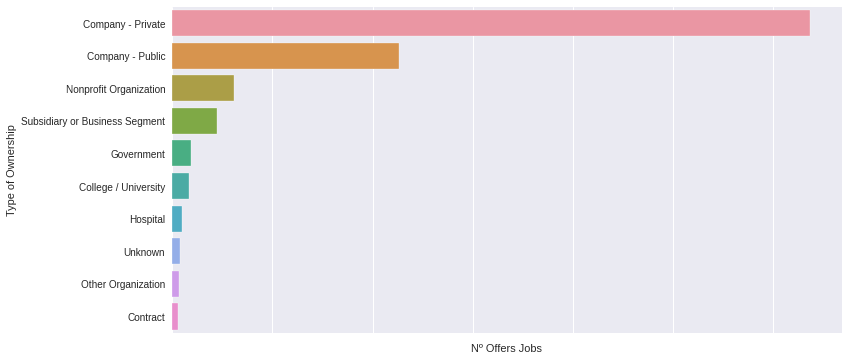

In [18]:
# Finaly, barplot with seaborn
plt.figure(figsize = (12,6))
plot = sns.barplot(x = 'Nº Offers Jobs', y = 'Type of Ownership', data = df_ownership)
plot = plot.set_xticklabels(plot.get_xticklabels(),
                           rotation = 65,
                           horizontalalignment = 'right')

# Range Salary for Each Sector

In [19]:
# Now, analyze Max salary in fuction the each sector
# Empty rows and fields innesesary
df_mean_salary = df1.groupby(['Sector']).mean().reset_index()\
                    .drop(['Founded','Easy Apply'], axis = 1)
# The sectors as government and non-profit it would't take for analitycs
df_mean_salary = df_mean_salary.drop(df_mean_salary[(df_mean_salary['Sector'] == '-1') | \
                                                    (df_mean_salary['Sector'] == 'Government') | \
                                                    (df_mean_salary['Sector'] == 'Non-Profit')].index,
                                     axis = 0) \
                                     .sort_values('Max Salary', ascending = False)

df_mean_salary.head()

,Sector,Rating,Min Salary,Max Salary
4,Biotech & Pharmaceuticals,3.390909,61.363636,104.848485
19,Real Estate,3.375000,57.250000,104.583333
3,"Arts, Entertainment & Recreation",3.800000,60.428571,100.857143
12,Information Technology,3.872456,55.298246,93.196491
1,Accounting & Legal,3.741860,58.511628,91.930233


In [20]:
# Visualization in bar graph with plotly

# Create Trace 1
trace1 = go.Bar(x = df_mean_salary['Sector'],
                y = df_mean_salary['Max Salary'],
                name = 'Max Salary',
                marker = dict(color ='rgb(55, 83, 109)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5)))

# Create Trace 2
trace2 = go.Bar(x = df_mean_salary['Sector'],
                y = df_mean_salary['Min Salary'],
                name = 'Min Salary',
                marker = dict(color = 'indianred',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5)))

data = [trace1, trace2]

layout = go.Layout(title = 'Salary Range For Each Sector', 
                   barmode = 'group')

chart = go.Figure(data = data, layout = layout)
iplot(chart)


# Distribution of Job Offers as a Data Analyst in the Territory of the United States

In [21]:
# Create a DataFrame with features (Mean Salary, Location and Mean Salary) 
df_states = pd.DataFrame()
dftemp = df1.copy()
dftemp['Mean Salary'] = (df1['Max Salary'] + df1['Min Salary']) / 2
df_states = pd.concat([df1['Sector'],df1['Location'], dftemp['Mean Salary']], axis = 1)
df_states.head()

,Sector,Location,Mean Salary
0,Non-Profit,"New York, NY",51.5
1,Health Care,"New York, NY",51.5
2,Information Technology,"New York, NY",51.5
3,Information Technology,"New York, NY",51.5
4,"Arts, Entertainment & Recreation","New York, NY",51.5


In [22]:
# Seperate Acronym and City from Location Field
df_states['City'], df_states['Acronym State'] = df_states['Location'].str.split(',', 1).str
# Remove field "Location" and values '-1' in field sector:
df_states = df_states.drop('Location', axis = 1) \
                     .drop(df_states[df_states['Sector'] == '-1'].index, axis = 0)
df_states.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,Sector,Mean Salary,City,Acronym State
0,Non-Profit,51.5,New York,NY
1,Health Care,51.5,New York,NY
2,Information Technology,51.5,New York,NY
3,Information Technology,51.5,New York,NY
4,"Arts, Entertainment & Recreation",51.5,New York,NY


In [23]:
# Apply Groupy with DataFrame both in the count and the mean values, after concated fields in the new DataFrame:
df_states_group = df_states.groupby(['Acronym State']).count().reset_index()
df_salary_group = df_states.groupby(['Acronym State']).mean().reset_index()

# New Dataframe 
df_map = pd.DataFrame()
df_map = pd.concat([df_states_group['Acronym State'], 
                    df_states_group['Sector'], 
                    df_salary_group['Mean Salary']], 
                   axis = 1)
df_map.head()

,Acronym State,Sector,Mean Salary
0,AZ,80,70.918750
1,"Arapahoe, CO",7,71.357143
2,CA,519,89.186898
3,CO,79,73.018987
4,DE,9,59.166667


In [24]:
# Round Mean Salary Value with Lambda function and remove row in 'Araphone, CO' Value of "Sector" field
df_map = df_map.drop([1], axis = 0).rename(columns = {'Sector': 'Nº Offers Jobs'})
df_map['Mean Salary'] = df_map['Mean Salary'].apply(lambda x: round(x, 2))
df_map.head()

,Acronym State,Nº Offers Jobs,Mean Salary
0,AZ,80,70.92
2,CA,519,89.19
3,CO,79,73.02
4,DE,9,59.17
5,FL,24,51.33


In [25]:
# Plot Map of United States with Plotly in module graph_objects:
locations = list(df_map['Acronym State'])

# Remove withe space in "Acronym State" field
for i in range(0, len(locations)):
    locations[i] = locations[i].replace(" ", "")

qjobs = list(df_map['Nº Offers Jobs'])

# Create text that displays the basic data when the cursor is over the chart status 
df_map_str = df_map.copy()
for col in df_map_str.columns:
    df_map_str[col] = df_map_str[col].astype(str)
    
# Apply '$' symbol in Mean Salary values
df_map_str['Mean Salary'] = df_map_str['Mean Salary'].apply(lambda x: "$" + x + "/Year")
# Text visualization:
df_map_str['Text'] = df_map_str['Acronym State']  + '<br>' + \
    "Nª Offers Jobs: " + df_map_str['Nº Offers Jobs'] + '<br>' \
        "Mean Salary from the Jobs as Data Analyst: " + '<br>' + df_map_str['Mean Salary'] + " (Thousands)"
df_map_str.head()

,Acronym State,Nº Offers Jobs,Mean Salary,Text
0,AZ,80,$70.92/Year,AZ<br>Nª Offers Jobs: 80<br>Mean Salary from ...
2,CA,519,$89.19/Year,CA<br>Nª Offers Jobs: 519<br>Mean Salary from...
3,CO,79,$73.02/Year,CO<br>Nª Offers Jobs: 79<br>Mean Salary from ...
4,DE,9,$59.17/Year,DE<br>Nª Offers Jobs: 9<br>Mean Salary from t...
5,FL,24,$51.33/Year,FL<br>Nª Offers Jobs: 24<br>Mean Salary from ...


In [26]:
# Plot Map in plotly
import plotly.graph_objects as go


fig = go.Figure(data = go.Choropleth(locations = locations,
                                    z = qjobs,
                                    locationmode = 'USA-states',
                                    text = df_map_str['Text'],
                                    marker_line_color = 'black',
                                    colorbar_title = 'Nº Offers Jobs'),) 

fig.update_layout(title_text = 'Nº Offers Jobs as Data Analyst<br>United States of America',
                 geo = dict(scope = 'usa',
                           projection = go.layout.geo.Projection(type = 'albers usa'),
                           showlakes = True,
                           lakecolor = 'rgb(255,255,255)'),)
fig.show()

In [27]:
# Created new dataframe for view jobs percentage as well as its mean salary year for each state
df_map2 = df_map.copy()
df_map2['Jobs Percentage'] = (df_map2['Nº Offers Jobs'] / df_map2['Nº Offers Jobs'].sum()) * 100
df_map2['Jobs Percentage'] = df_map2['Jobs Percentage'].apply(lambda x: round(x, 1))
df_map2 = df_map2.sort_values('Jobs Percentage', ascending = True) \
                 .drop(df_map2[df_map2['Jobs Percentage'] <= 2.0].index, axis = 0) \
                 .reset_index() \
                 .drop('index', axis = 1)
df_map2.head(11)

,Acronym State,Nº Offers Jobs,Mean Salary,Jobs Percentage
0,VA,41,64.37,2.2
1,WA,44,62.12,2.3
2,NJ,73,71.42,3.9
3,NC,76,67.88,4.0
4,CO,79,73.02,4.2
5,AZ,80,70.92,4.2
6,PA,98,61.51,5.2
7,IL,141,77.65,7.4
8,NY,284,71.30,15.0
9,TX,343,58.88,18.1


In [28]:
# Create two Subplots:
fig_states = make_subplots(rows = 1, cols = 2, specs = [[{},{}]], shared_xaxes = True,
                          shared_yaxes = False, vertical_spacing = 0.001)

fig_states.append_trace(go.Bar(x = df_map2['Jobs Percentage'],
                       y = df_map2['Acronym State'],
                       marker = dict(color = 'rgba(50, 171, 40, 0.7)',
                                    line = dict(color='rgba(60, 171, 120, 1.0)',
                                               width = 1,)
                                    ),
                       name = 'Percentage Jobs',
                       orientation = 'h',
                       ),
                1, 1)

fig_states.append_trace(go.Scatter(x = df_map2['Mean Salary'],
                                  y = df_map2['Acronym State'],
                                  mode = 'lines+markers',
                                  line_color = 'rgb(128, 0, 128)',
                                  name = 'Mean Salary'),
                       1, 2)

fig_states.update_layout(title = 'Distribution of the Offers Jobs From in United States',
                        yaxis = dict(showgrid = True,
                                    showline = True,
                                    showticklabels = True,
                                    linecolor = 'rgba(102,102,102,0.8)',
                                    linewidth = 2,
                                    domain = [0, 0.94],
                                    ),
                        yaxis2 = dict(showgrid = True,
                                     showline = True,
                                     showticklabels = False,
                                     linecolor = 'rgba(102,102,102,0.8)',
                                     linewidth = 1,
                                     domain = [0, 0.94],
                                     ),
                        xaxis = dict(zeroline = False,
                                    showline = False,
                                    showticklabels = True,
                                    showgrid = True,
                                    domain = [0, 0.40],
                                    dtick = 5,
                                    ),
                        xaxis2 = dict(zeroline = False,
                                     showline = False,
                                     showticklabels = True,
                                     showgrid = True,
                                     domain = [0.47, 1],
                                     side = 'top',
                                     dtick =8,
                                     ),
                        legend = dict(x = 0.02, y = 1.07, font_size = 12),
                        margin = dict(l = 100, r = 20, t = 70, b = 70),
                        paper_bgcolor='rgb(250, 248, 255)',
                        plot_bgcolor='rgb(250, 248, 255)',)

fig_states.show()

# Hard Skills That it is Most Requested per The Companies

In [29]:
# A dictionary is created with a list of hard skills to search in the job description fields
import re #Library for regular expresions 

hard_skills_dict = {
    'Python': r"python",
    'R': r"[\b\s/]r[\s,\.]",
    'Excel': r"excel",
    'SQL': r"sql",
    'NoSQL': r"\bNo[\s,-]sql[\s]",
    'PowerBI': r"power[\s]BI",
    'Tableau': r"tableau",
    'SPSS': r'\bSPSS\b',
    'Big Data': r"\sbig\sdata\s",
    'SAP BI': r"SAP[\s]BI",
    'MongoDB': r"MongoDB",
    'Hadoop': r"Hadoop",
    'SAS': r"\bSAS\b",
    'VBA': r"\bvba\b",
    'AWS': r"\baws\b",
    'Git': r"\bGit",
    'QlikView': r"\bQlikView",
    'Oracle BI': r"oracle[\n]BI",
    'Scala': r"Scala",
    'Dashboard': r"\bDashboard[s]",
    'Spark': r"Spark",
    'Matlab': r"Matplotlib",
    'Linux': r"linux",
    'Unix': r"unix",
    'Looker': r"looker",
    'C# or C++': r"\bC[#\+\+]",
    'Java': r"java",
    'PowerPivot': r"Power[\s]Pivot",
    'PowerQuery': r"Power[\s]Query",
    'BigQuery': r"Big[\s]Query",
    'Apache Cassandra': r"[\b\s]Cassandra[\b\s]",
    'Neo4j': r"Neo4j",
    'TensorFlow': r"TensorFlow"
}

hard_skills_count = {}

# Loop through skills for count the frecuency in Jobs Description Field.
for key, search in hard_skills_dict.items():
    hard_skills_count[key] = df1['Job Description'].str.contains(search, flags = re.IGNORECASE).sum()

df_skills = pd.DataFrame.from_dict(hard_skills_count, orient = 'index') \
                        .sort_values(0, ascending = False) \
                        .reset_index() \
                        .rename(columns = {'index': 'Skills', 0: 'Count'})

df_skills['Relative Frecuency'] = (df_skills['Count'] / sum(df_skills['Count'])) *100
df_skills['Relative Frecuency'] = df_skills['Relative Frecuency'].apply(lambda x: round(x, 2))

# Remove values less than '1' per cent in its Relative Frequency
df_skills = df_skills.drop(df_skills[df_skills['Relative Frecuency'] < 1.00].index, axis = 0)

df_skills.head(df_skills.shape[0])

,Skills,Count,Relative Frecuency
0,SQL,1389,20.13
1,Excel,1354,19.62
2,Python,637,9.23
3,Tableau,620,8.99
4,Dashboard,473,6.86
5,R,375,5.43
6,SAS,338,4.90
7,Java,204,2.96
8,Scala,197,2.86
9,PowerBI,180,2.61


In [30]:
# Plot visualization the tops hards skills.
chart_skills = px.bar(df_skills, x = 'Skills', y = 'Count',
                     color = 'Relative Frecuency',
                     labels = {'Skills': 'Hard Skills','Count': 'Nº of Requests'})
chart_skills.show()

# Cluster Analysis (K-Means) and PCA

In [31]:
# A cluster study is performed in a data frame for the data in order to find similarities
# In addition, this is supported with PCA study
# Import Library
from sklearn.decomposition import PCA # For PCA dimensionality reduction
from sklearn.cluster import KMeans    # Method for Cluster Kmeans
from sklearn.preprocessing import QuantileTransformer #Realize Scaler Data
# For visualization from 3D plot
import plotly.express as px

In [32]:
# Create Data Frame with "Mean Salary, Founded Years and Rating" for cluster method and PCA
df2 = df1.copy()
df2 = df2.drop(df2[df2['Founded'] == -1].index, axis = 0)
df2 = df2.drop(df2[df2['Rating'] == -1.0].index, axis = 0)
df2['Years Founded'] = (2020 - df2['Founded'])
df2['Mean Salary'] = (df2['Max Salary'] + df2['Min Salary']) / 2

# Create DataFrame
df3 = pd.DataFrame()
df3 = pd.concat([df2['Rating'], df2['Mean Salary'], df2['Years Founded']], axis = 1)
df3.head()

,Rating,Mean Salary,Years Founded
0,3.2,51.5,59
1,3.8,51.5,127
2,3.4,51.5,17
3,4.1,51.5,18
4,3.9,51.5,11


In [33]:
# Rescale values with QuantileTransformer class
df3_scaler = QuantileTransformer().fit_transform(df3)
print(df3_scaler)

[[0.16766767 0.16616617 0.8023023 ]
 [0.55005005 0.16616617 0.92495974]
 [0.26576577 0.16616617 0.31381381]
 ...
 [0.07157157 0.81031031 0.87287287]
 [0.10810811 0.81031031 0.66266266]
 [0.26576577 0.81031031 0.95695696]]


In [34]:
# PCA calculation is performed with a reduction of dimensionality equal to 2
pca = PCA(n_components = 2)
df_component = pca.fit_transform(df3_scaler)
print(df_component.shape, df3_scaler.shape)

(1573, 2) (1573, 3)


In [35]:
# The clusters numbers is determined to minimize inertian infracluster through elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, 
                   max_iter = 300, random_state = 0)
    kmeans.fit(df3_scaler)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

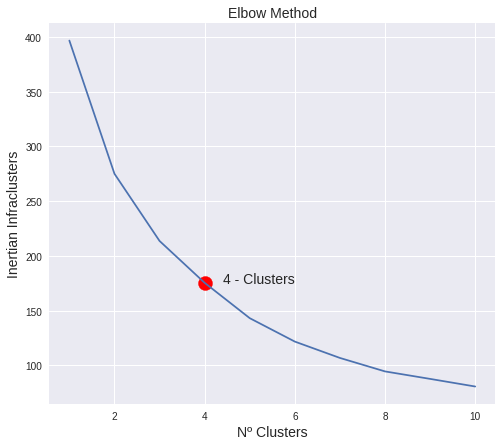

In [36]:
#Plot curve inertian infracluster
fig = plt.figure(figsize = (8,7))
plt.plot(range(1,11), wcss)
plt.scatter(4, wcss[3], c = 'red',s = 200)
plt.text(4 + 0.4, wcss[3], s = '4 - Clusters', fontsize = 14)
plt.xlabel('Nº Clusters', fontsize = 14)
plt.ylabel('Inertian Infraclusters', fontsize = 14)
plt.title('Elbow Method', fontsize = 14)

In [37]:
# 4 clusters are selected, at that elbow point an optimized cluster can be achieved.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, 
                max_iter = 300, random_state = 0)
kmeans.fit(df3_scaler)
y_predict = kmeans.predict(df3_scaler)
print(y_predict)

[3 3 1 ... 0 0 0]


In [38]:
# First one, 3D visualization are better for show clusters calculated
colors = ['crimson','yellow', 'indigo', 'lightseagreen']

fig3d = px.scatter_3d(df3, x = 'Rating', y = 'Mean Salary', z = 'Years Founded', 
                      color = recode(pd.Series(pd.Categorical(y_predict, [0,1,2,3,4])),
                                    {0: 'Cluster-1',
                                     1: 'Cluster-2',
                                     2: 'Cluster-3',
                                     3: 'Cluster-4'}),
                      color_discrete_sequence= colors,
                      opacity = 0.9, 
                      size_max = 5)

fig3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig3d.show()

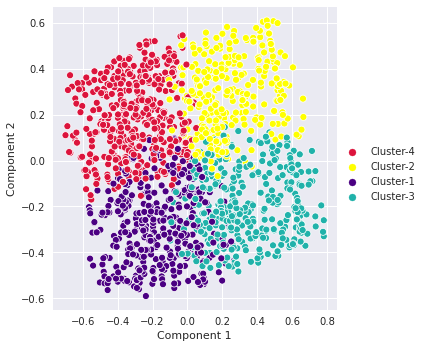

In [39]:
# Graph PCA component with cluster predict
dfsns = pd.DataFrame(df_component)
# Rename Columns:
dfsns = dfsns.rename(columns = {0: 'Component 1', 1: 'Component 2'})

#Plot with Seaborn
sns.set_style('darkgrid')
sns.relplot(x = 'Component 1', 
            y = 'Component 2', 
            hue = recode(pd.Series(pd.Categorical(y_predict, [0,1,2,3,4])),
                        {0: 'Cluster-1',
                         1: 'Cluster-2',
                         2: 'Cluster-3',
                         3: 'Cluster-4'}), 
            data = dfsns, 
            palette= colors)

In [40]:
df_predict = pd.DataFrame(y_predict)
df_predict = df_predict.rename(columns = {0 : 'Cluster'})
df_predict.head()

,Cluster
0,3
1,3
2,1
3,1
4,1


In [41]:
# Dataframe with cluster classification
df3_scaler = pd.DataFrame(df3_scaler)
df3_scaler = df3_scaler.rename(columns = {0: 'Rating', 1: 'Mean Salary', 2: 'Years Founded'})
df3_scaler['Cluster'] = df_predict['Cluster']
df3_scaler['Cluster'] = recode(df3_scaler['Cluster'], 
                               {0: 'Cluster-1', 
                                1: 'Cluster-2', 
                                2: 'Cluster-3',
                                3: 'Cluster-4'}
                              )
df3_scaler.head()

,Rating,Mean Salary,Years Founded,Cluster
0,0.167668,0.166166,0.802302,Cluster-4
1,0.550050,0.166166,0.924960,Cluster-4
2,0.265766,0.166166,0.313814,Cluster-2
3,0.754254,0.166166,0.338839,Cluster-2
4,0.590591,0.166166,0.164665,Cluster-2


In [42]:
# Groupby apply
df_cluster_group = df3_scaler.groupby('Cluster').mean()
df_cluster_group.head(df_cluster_group.shape[0])

,Rating,Mean Salary,Years Founded
Cluster,,,
Cluster-1,0.240229,0.716436,0.552065
Cluster-2,0.698244,0.256176,0.252586
Cluster-3,0.750158,0.777827,0.352982
Cluster-4,0.376226,0.263138,0.745334


In [43]:
# RADAR PLOT:
colors = ['crimson','gold', 'darkcyan', 'magenta']
y = np.array(df_cluster_group)
categories = list(df_cluster_group.columns)
radar_chart = go.Figure()

#Cluster 1
radar_chart.add_trace(go.Scatterpolar(r = y[:1,:].tolist()[0],
                                     theta = categories,
                                     fill = 'toself',
                                     name = 'Cluster-1',
                                     marker = dict(color = colors[0])
                                     ))

#Cluster 2
radar_chart.add_trace(go.Scatterpolar(r = y[1:2,:].tolist()[0],
                                     theta = categories,
                                     fill = 'toself',
                                     name = 'Cluster-2',
                                     marker = dict(color = colors[1])
                                     ))

#Cluster 3
radar_chart.add_trace(go.Scatterpolar(r = y[2:3,:].tolist()[0],
                                     theta = categories,
                                     fill = 'toself',
                                     name = 'Cluster-3',
                                     marker = dict(color = colors[2])
                                     ))

#Cluster 4
radar_chart.add_trace(go.Scatterpolar(r = y[3:4,:].tolist()[0],
                                     theta = categories,
                                     fill = 'toself',
                                     name = 'Cluster-4',
                                     marker = dict(color = colors[3])
                                     ))

# Update Layout
radar_chart.update_layout(polar = dict(radialaxis = dict(visible = True,
                                                        range = [0.0, 0.8])),
                         showlegend = True,
                         title = "Graph Radar About Principal Fields")


radar_chart.show()

In [44]:
# Plot clusters in graph bars to identify to better
fig_bars = make_subplots(rows = 1, cols = 4, shared_yaxes = True)


# Cluster 1
fig_bars.add_trace(go.Bar(x = categories, 
                          y = y[:1,:].tolist()[0],
                          marker = dict(color = colors,),
                          name = 'Cluster - 1'),
                   row = 1, 
                   col = 1)
# Cluster 2
fig_bars.add_trace(go.Bar(x = categories, 
                          y = y[1:2,:].tolist()[0],
                          marker = dict(color = colors),
                          name = 'Cluster - 2'),
                   row = 1,
                   col = 2)

# Cluster 3
fig_bars.add_trace(go.Bar(x = categories, 
                          y = y[2:3,:].tolist()[0],
                          marker = dict(color = colors), 
                          name = 'Cluster - 3'),
                   row = 1,
                   col = 3)

# Cluster 4
fig_bars.add_trace(go.Bar(x = categories, 
                          y = y[3:4,:].tolist()[0],
                          marker = dict(color = colors), 
                          name = 'Cluster - 4'),
                   row = 1,
                   col = 4)

fig_bars.update_layout(showlegend = False, title = 'Cluster Behavior')

fig_bars.show()